In [1]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]
print(len(messages))

5574


In [2]:
messages[2002]

'ham\tIdea will soon get converted to live:)'

In [3]:
for mess_no,messages in enumerate(messages[:10]):
    print(mess_no,messages)
    print('/n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
/n
1 ham	Ok lar... Joking wif u oni...
/n
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
/n
3 ham	U dun say so early hor... U c already then say...
/n
4 ham	Nah I don't think he goes to usf, he lives around here though
/n
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
/n
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
/n
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
/n
8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. C

In [4]:
import pandas as pd

In [5]:
messages=pd.read_csv('SMSSpamCollection',sep='\t',
                     names=["label", "message"])

In [6]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
messages.groupby('label').describe().head()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [9]:
messages['length'] = messages['message'].apply(len) #new col for length 
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [10]:
messages[messages['length']==910]['message'].iloc[0] #the max one !!

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

Looks like we have some sort of Romeo sending texts! But let's focus back on the idea of trying to see if message length is a distinguishing feature between ham and spam:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000209BF24E1C0>,
      dtype=object)

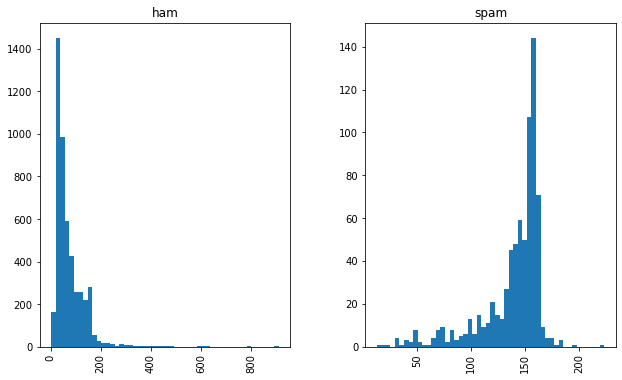

In [11]:
messages.hist(column='length',by='label',bins=50,figsize=(10,6)) 

we've been able to discover a trend that spam messages tend to have more characters

# Text Pre-processing no punctuation / stopwords

In [12]:
import string


In [13]:
mess='Sample message! Notice: it has punctuation.'


In [14]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
nopunc=[char for char in mess if char  not in string.punctuation]
nopunc="".join(nopunc)
nopunc

'Sample message Notice it has punctuation'

In [16]:
from nltk.corpus import stopwords

In [17]:
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [18]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [19]:
clean_mess=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [20]:
#all of this in one function 
def text_process(mess):
    nopunc=[char for char in mess if char  not in string.punctuation] #REMOVE PUNC 
    nopunc="".join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')] #REMOVE STOPWORDS


In [21]:
#run the function #token is the clean version of the words 
#Now let's "tokenize" these messages. Tokenization is just the term used to describe the process of converting the
#normal text strings in to a list of tokens (words that we actually want).
messages['message'].head().apply(text_process) 

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

# Vectorization

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
bow_trans =CountVectorizer(analyzer=text_process).fit(messages['message']) #must use the function text_proccess 
#take a bit of time because its a large metrics  

In [26]:
print(len(bow_trans.vocabulary_))

11425


In [27]:
mess4=messages['message'][3]

In [28]:
mess4

'U dun say so early hor... U c already then say...'

In [33]:
bow4=bow_trans.transform([mess4])
print(bow4)     

#repeted twice (0, 4068)	2   what is the word?

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [35]:
bow_trans.get_feature_names()[9554]

'say'

In [36]:
message_bow=bow_trans.transform(messages['message'])

In [37]:
print('the shape of the metrics: ',message_bow.shape) 

the shape of the metrics:  (5572, 11425)


In [38]:
message_bow.nnz #non zero !

50548

In [43]:
#copy paste the fourmel
sparsity = (100.0 * message_bow.nnz / (message_bow.shape[0] * message_bow.shape[1]))
print('sparsity: {}'.format(sparsity))  

#how many zeros in my metrics 

sparsity: 0.07940295412668218


In [44]:
from sklearn.feature_extraction.text import TfidfTransformer

In [46]:
tfidf_trans=TfidfTransformer().fit(message_bow)

In [49]:
tf4=tfidf_trans.transform(bow4)
print(tf4)  #term frequency 

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [50]:
tfidf_trans.idf_[bow_trans.vocabulary_['hi']] #IDF (inverse document frequency)  of the word 'hi'

6.5811663498461135

In [51]:
message_tf=tfidf_trans.transform(message_bow)

In [52]:
#the naive classyfier 
from sklearn.naive_bayes import MultinomialNB

In [53]:
spam_ded_modl=MultinomialNB().fit(message_tf,messages['label'])

In [54]:
spam_ded_modl.predict(tf4)

array(['ham'], dtype='<U4')

In [56]:
spam_ded_modl.predict(tf4)[0]

'ham'

In [57]:
messages['label'][3]

'ham'

In [58]:
messages['label'][50]

'ham'

In [62]:
messages['label'][75]

'ham'

In [63]:
all_pred=spam_ded_modl.predict(message_tf)

In [64]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [65]:
messages['label'][2]

'spam'

In [70]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test =train_test_split(messages['message'], messages['label'], test_size=0.2)



In [71]:
from sklearn.pipeline import Pipeline


In [73]:
pipeline=Pipeline([ 
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()) # train on TF-IDF vectors w/ Naive Bayes classifier])
     ]) 

In [74]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000209C2777D30>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [75]:
predictions=pipeline.predict(msg_test)

In [76]:
from sklearn.metrics import classification_report , confusion_matrix

In [77]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1016
        spam       0.70      1.00      0.82        99

    accuracy                           0.96      1115
   macro avg       0.85      0.98      0.90      1115
weighted avg       0.97      0.96      0.96      1115

